# Bruk av for-løkker for å finne funksjonsverdier for plotting
Ved plotting av vanlige matematiske funksjoner trenger vi ikke løkker.

Vi kan bruke numpy arrays for x-verdiene og da kjøre hele arrayet gjennom funksjonen i en operasjon, jfr. eksempel under:

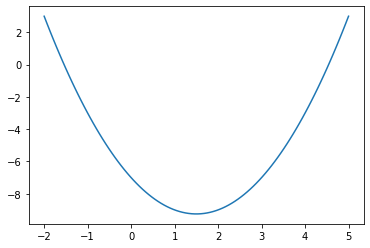

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x ** 2 - 3 * x - 7

x = np.linspace(-2,5,100)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Men ikke alle funksjoner er så enkle å ha med å gjøre. Anta at vi har en funksjon gitt som følger:

$g(x) = \left\{ 
  \begin{array}{ c l }
    \sqrt{x} & \quad \textrm{hvis } x \geq 0 \\
    0.25x                 & \quad \textrm{ellers}
  \end{array}
\right.$

I Python vil denne funksjonen typisk lages med en if-setning. Vi kan prøve å bytte inn g(x) i koden vår og plotte, men...

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    if x >= 0:
        return np.sqrt(x)
    else:
        return 0.25 * x

x = np.linspace(-2,5,100)
y = g(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Som vi ser her: Vi får __ValueError__ fordi en if-test ikke lar seg utføre på et helt array.

Altså: Når en funksjonsdefinisjon inneholder en if-setning, går det ikke lenger å kjøre et helt numpy-array gjennom funksjonen som én enkel operasjon.

Men nå som du har lært å programmere for-løkker, kan dette redde situasjonen. 
Nedenfor har vi endret noe av koden ved å skrive ei løkke:

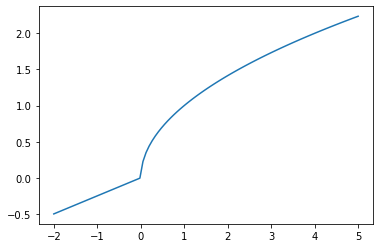

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    if x >= 0:
        return np.sqrt(x)
    else:
        return 0.25 * x

x = np.linspace(-2,5,100)   # her har vi 100 x-verdier i variabelen x
y = np.zeros(len(x))        # lager y som et array med like mange nuller som det er verdier i x
for i in range(len(x)):     # lar verdien i gå gjennom sekvensen 0...99, dvs. 100x, samme antall som verdier i x
    y[i] = g(x[i])          # i hver runde av løkka regner vi ut y-verdien tilhørende x-verdien

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Litt knotete med løsningen over er at for-løkka vår kun funker til å finne y-verdier akkurat for g(x)

Litt mer elegant kan vi
- lage koden som finner y-verdier som en funksjon'
- gi inn __funksjonen__ som skal plottes, samt x-verdiene, som argumenter til denne

Da blir vi i stand til å bruke samme kode til å regne y-verdier for flere ulike funksjoner som pga if-setninger eller andre utfordringer ikke muliggjør å gjøre en enkelt operasjon på hele numpy-arrayet.

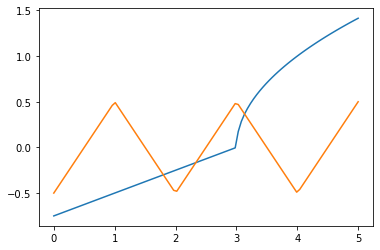

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def g(x): # funksjonsdefinisjon som inneholder if-setning, kan dermed bare ta enkelttall som argument, ikke array
    if x >= 3:
        return np.sqrt(x-3)
    else:
        return 0.25 * (x-3)

def v(x): # funksjonsdefinisjon som inneholder if-setning, kan dermed bare ta enkelttall som argument, ikke array
    if int(x) % 2 == 0:
        return x - int(x) - 0.5
    else:
        return 0.5 - x + int(x)

def y_values(f, x):             # har funksjon f som en parameter, fleksibelt hvilken f vi regner for
    y = np.zeros(len(x))        # lager y som et array med like mange nuller som det er verdier i x
    for i in range(len(x)):     # lar verdien i gå gjennom sekvensen 0...99, dvs. 100 runder, samme antall som verdier i x
        y[i] = f(x[i])          # hver runde av løkka regner vi ut den i'te y-verdien basert på i'te x-verdi
    return y

x = np.linspace(0,5,100)   # her har vi 100 x-verdier i variabelen x
y1 = y_values(g, x)        # y1 inneholder verdiene til g(x) fordi g gis inn som argument for parameteren f
y2 = y_values(v, x)        # y2 inneholder verdiene til v(x) fordi v gis inn som argument for parameteren f

# lager og viser selve plottet
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
plt.show()